In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

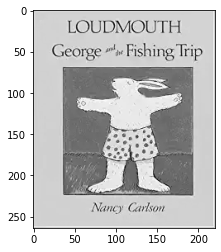

In [15]:
image = cv2.imread('book.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap = 'gray')

In [16]:
def flipHorizontal(kernel):
    i = 0 #first column
    j = kernel.shape[1] - 1 #last column
    while True:
        if i == j: #while center is not reached
            break
        else:
            for c in range(kernel.shape[0]): #for each value in columns
                kernel[c][i], kernel[c][j] = kernel[c][j], kernel[c][i] #Swapping
            i = i + 1 #move to new column from start
            j = j - 1 #come back to a new column from end 
    return kernel

def flipVertical(kernel):
    i = 0 #first row
    j = kernel.shape[0] - 1 #last row
    while True:
        if i == j: #while center is not reached
            break
        else:
            for c in range(kernel.shape[1]): #for each value in rows
                kernel[i][c], kernel[j][c] = kernel[j][c], kernel[i][c] #Swapping
            i = i + 1 #move to the new row from start
            j = j - 1 #come back to a new row from end
    return kernel

def flip(kernel):
    kernel = flipHorizontal(kernel)
    kernel = flipVertical(kernel)
    return kernel

def multiply(A,B): #multiply two matrices, 
    ans = 0
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            ans += A[i,j] * B[i,j] #multiply same indexex and add all of them
    return ans

def normalizeImage(image): #normalize an image
    image[:,:,0] = normalize(image[:,:,0]) #normalize red_channel
    image[:,:,1] = normalize(image[:,:,1]) #normalize green_channel
    image[:,:,2] = normalize(image[:,:,2]) #normalize blue_channel
    return image

def normalize(image):
    maxV = image.max()
    minV = image.min()
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            image[i,j] = ((image[i,j]-minV)*255)/(maxV-minV)
    return image

def convolution(image,kernel):
    tempImg = np.zeros(shape=image.shape) #Convoluted Image
    x,y = 1,1 #To store new values
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            A = image[i-1:i+(1+1),j-1:j+(1+1)] #Extract image sub matrix that is required to multiply
            tempImg[x,y] = multiply(A,kernel) #Multiply it with kernel and store the result in new image
            y = y + 1 #move to the next column
        x = x + 1 #move to the next row
        y = 1 
    return tempImg

def filter(image,kernel):
    newImg = np.zeros(shape=image.shape,dtype=int) #Filtered Image
    kernel = flip(kernel) #Flipped Kernel
    newImg[:,:,0] = convolution(image[:,:,0],kernel) 
    newImg[:,:,1] = convolution(image[:,:,1],kernel)
    newImg[:,:,2] = convolution(image[:,:,2],kernel)
    return newImg

In [27]:
kernelX = np.array(([-1,0,1],[-1,0,1],[-1,0,1]))/3
kernelY = np.array(([1,1,1],[0,0,0],[-1,-1,-1]))/3
imageX = normalize(convolution(image,kernelX))
imageY = normalize(convolution(image,kernelY))
imageX

array([[127.5       , 127.5       , 127.5       , ..., 127.5       ,
        127.5       , 127.5       ],
       [127.5       , 127.5       , 127.86221591, ..., 136.19318182,
        126.23224432, 127.5       ],
       [127.5       , 127.68110795, 127.5       , ..., 144.52414773,
        122.42897727, 127.5       ],
       ...,
       [127.5       , 136.73650568, 125.32670455, ..., 140.53977273,
        118.26349432, 127.5       ],
       [127.5       , 131.66548295, 125.32670455, ..., 133.83877841,
        119.35014205, 127.5       ],
       [127.5       , 127.5       , 127.5       , ..., 127.5       ,
        127.5       , 127.5       ]])

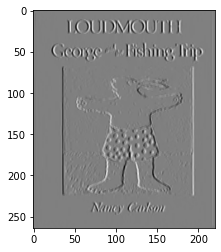

In [18]:
plt.imshow(imageX,cmap = 'gray')

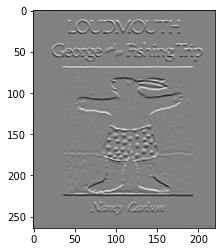

In [19]:
plt.imshow(imageY,cmap = 'gray')

In [20]:
t,imageXB = cv2.threshold(imageX, 200, 255, cv2.THRESH_BINARY)
t,imageYB = cv2.threshold(imageY, 200, 255, cv2.THRESH_BINARY)

In [21]:
newImgXY = imageXB.copy()
for i in range(imageXB.shape[0]):
    for j in range(imageXB.shape[1]):
            sqX = imageXB[i,j] * imageXB[i,j]
            sqY = imageYB[i,j] * imageYB[i,j]
            sumXY = sqX + sqY
            sumXY = math.sqrt(sumXY)
            newImgXY[i,j] = sumXY

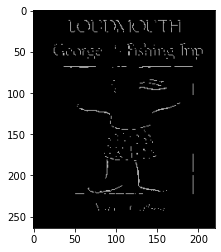

In [22]:
plt.imshow(newImgXY,cmap = 'gray')

In [23]:
imX = cv2.filter2D(image,cv2.CV_32F,kernelX)
imX = np.clip(imX,0,255)

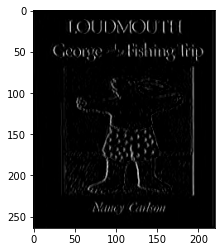

In [24]:
plt.imshow(imX,cmap='gray')

In [25]:
imX

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.4333336e+01,
        3.3333588e-01, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 6.6667175e-01, ..., 1.6000008e+01,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 3.3333588e-01, 7.6293945e-06, ..., 3.1333336e+01,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.7000000e+01, 0.0000000e+00, ..., 2.4000000e+01,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.6666641e+00, 0.0000000e+00, ..., 1.1666664e+01,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.5666664e+01, 0.0000000e+00, ..., 4.3333282e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [26]:
imageX

array([[127.5       , 127.5       , 127.5       , ..., 127.5       ,
        127.5       , 127.5       ],
       [127.5       , 127.5       , 127.86221591, ..., 136.19318182,
        126.23224432, 127.5       ],
       [127.5       , 127.68110795, 127.5       , ..., 144.52414773,
        122.42897727, 127.5       ],
       ...,
       [127.5       , 136.73650568, 125.32670455, ..., 140.53977273,
        118.26349432, 127.5       ],
       [127.5       , 131.66548295, 125.32670455, ..., 133.83877841,
        119.35014205, 127.5       ],
       [127.5       , 127.5       , 127.5       , ..., 127.5       ,
        127.5       , 127.5       ]])